<a href="https://colab.research.google.com/github/chiharuishida/Pyproject/blob/main/NumberReader_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import mnist
from keras import models
from keras import layers
import keras.utils
from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt


In [9]:
#extracting data from Google API (https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

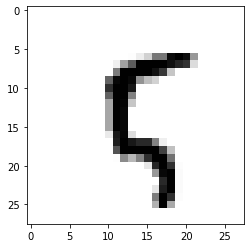

In [10]:
#first, let's see what the 28 X 28 pixel number images looks like:
plt.imshow(x_train[0], cmap='gray_r')
plt.imshow(x_train[2], cmap='gray_r')
plt.imshow(x_train[100], cmap='gray_r')

In [11]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

print(train_labels[3])

network = models.Sequential()
network.add(layers.Dense(784, activation= 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation= 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation= 'softmax'))
network.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

network=models.Sequential()

network.add(layers.Dense(784,activation= 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784,activation= 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10,activation= 'softmax'))


network.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28* 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[2])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc, 'test_loss', test_loss)

1
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Epoch 1/5
469/469 [==============================] - 12s 24ms/step - loss: 0.2004 - accuracy: 0.9384
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0743 - accuracy: 0.9762
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 4/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9822
test_acc:  0.982200026512146 test_loss 0.07043533772230148


In [12]:
#let's create a submission file with results
results = network.predict(test_images)
import numpy as np
import pandas as pd
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

# output
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis=1)
submission.to_csv("numberclassification.csv", index=False)